In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


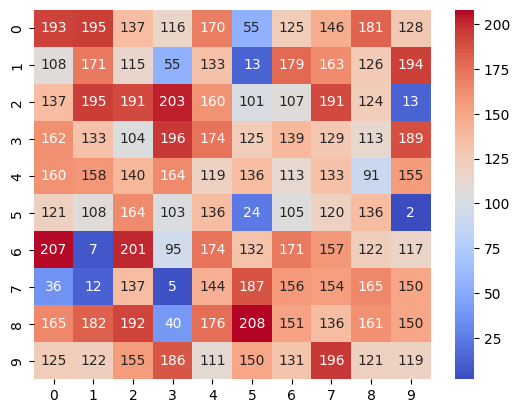

In [4]:
# "01.txt"
# entry = np.array([193, 195, 137, 116, 170, 55, 125, 146, 181, 128, 108, 171, 115, 55, 133, 13, 179, 163, 126, 194, 137, 195, 191, 203, 160, 101, 107, 191, 124, 13, 162, 133, 104, 196, 174, 125, 139, 129, 113, 189, 160, 158, 140, 164, 119, 136, 113, 133, 91, 155, 121, 108, 164, 103, 136, 24, 105, 120, 136, 2, 207, 7, 201, 95, 174, 132, 171, 157, 122, 117, 36, 12, 137, 5, 144, 187, 156, 154, 165, 150, 165, 182, 192, 40, 176, 208, 151, 136, 161, 150, 125, 122, 155, 186, 111, 150, 131, 196, 121, 119])

# entry = entry.reshape(10, 10)
# sns.heatmap(entry, annot=True, fmt='d', cmap='coolwarm')
# plt.show()

In [23]:
df = pd.read_csv("resultados_linear_300s.csv")
df.columns = df.columns.str.replace(' ', '')
df = df.replace(' ', '', regex=True)
df

,Arquivo,Status,Melhor_valor_encontrado,Bound,Solução,Tempo_decorrido,Número_de_iterações
0,1,OPTIMAL,1034999,10350119999999998,"[193,195,137,116,170,55,125,146,181,128,108,17...",15.87,15824
1,2,OPTIMAL,11984785,11984804,"[719,599,334,495,421,656,8,737,708,666,349,816...",95.01,59662
2,3,TIME_LIMIT,45800019,66283519,"[97,106,14,645,600,557,1399,35,403,396,782,517...",326.66,244373
3,4,TIME_LIMIT,-Inf,-Inf,Nenhuma,311.03,119470
4,5,TIME_LIMIT,-Inf,-Inf,Nenhuma,304.45,120635
5,6,TIME_LIMIT,-Inf,-Inf,Nenhuma,300.41,231212
6,7,TIME_LIMIT,-Inf,-Inf,Nenhuma,300.42,199345
7,8,TIME_LIMIT,42658407,42668333,"[263,16,299,767,1292,1170,39,496,1602,785,1189...",307.02,118220
8,9,OPTIMAL,8461953,8461955,"[38,128,2,167,367,353,98,59,183,116,97,107,179...",290.74,124426
9,10,TIME_LIMIT,-Inf,-Inf,Nenhuma,300.44,223454


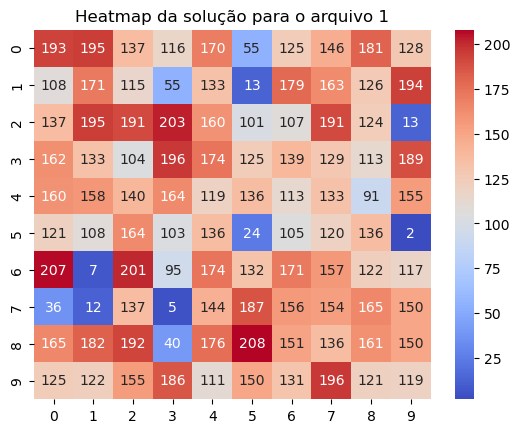

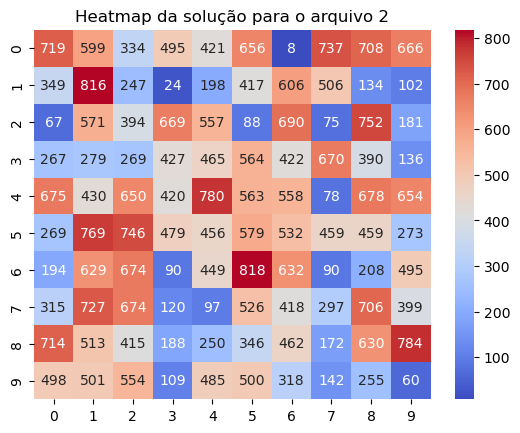

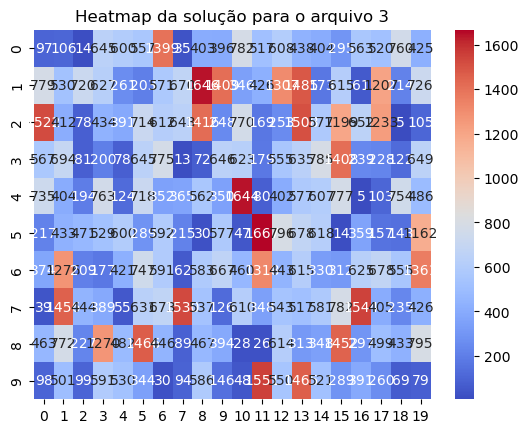

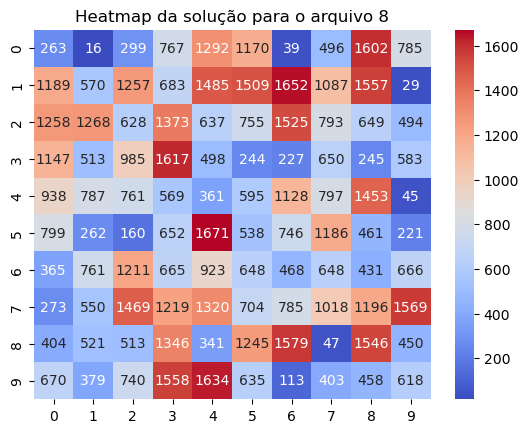

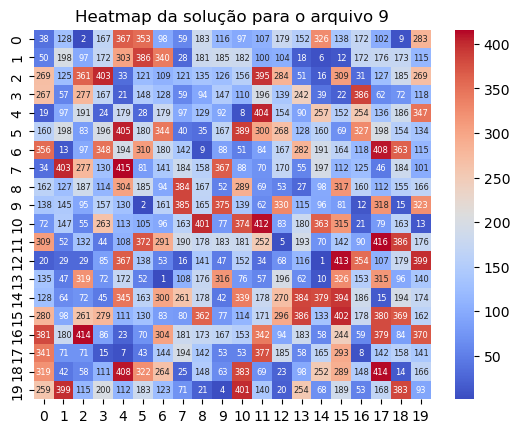

In [52]:
solucoes = df["Solução"].values
solucoes = [x[1:-1] for x in solucoes]
# turn strings into lists of integers
files = df["Arquivo"].values
solucoes

for sol, fil in zip(solucoes, files):
    if sol == 'enhum':
        continue
    # turn sol into a list of integers
    sol = sol.split(',')
    # convert to integers
    sol = [int(x) for x in sol]
    np.array(sol)
    length = len(sol)
    if length == 100:
        sol = np.array(sol).reshape(10, 10)
        sns.heatmap(sol, annot=True, fmt='d', cmap='coolwarm')
        plt.title(f"Heatmap da solução para o arquivo {fil}")
        plt.show()
    elif length == 400:
        sol = np.array(sol).reshape(20, 20)
        sns.heatmap(sol, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 6})
        plt.title(f"Heatmap da solução para o arquivo {fil}")
        plt.show()
    elif length == 200:
        sol = np.array(sol).reshape(10, 20)
        sns.heatmap(sol, annot=True, fmt='d', cmap='coolwarm')
        plt.title(f"Heatmap da solução para o arquivo {fil}")
        plt.show()
    elif length == 800:
        sol = np.array(sol).reshape(20, 40)
        sns.heatmap(sol, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 6})
        plt.title(f"Heatmap da solução para o arquivo {fil}")
        plt.show()    

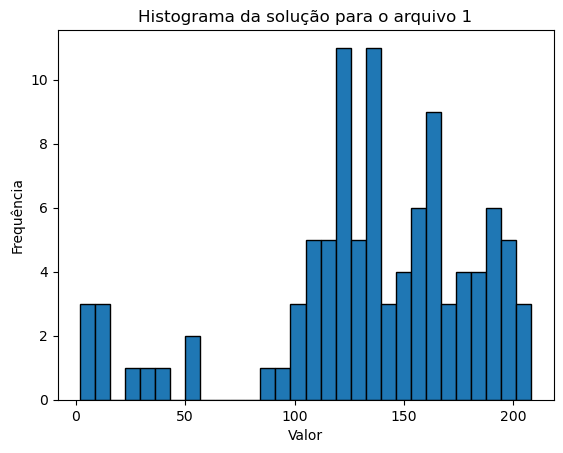

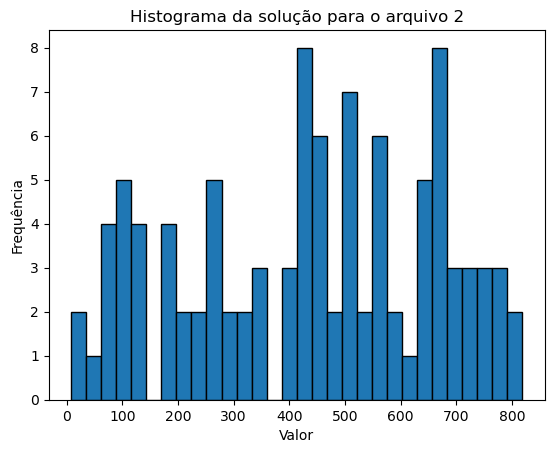

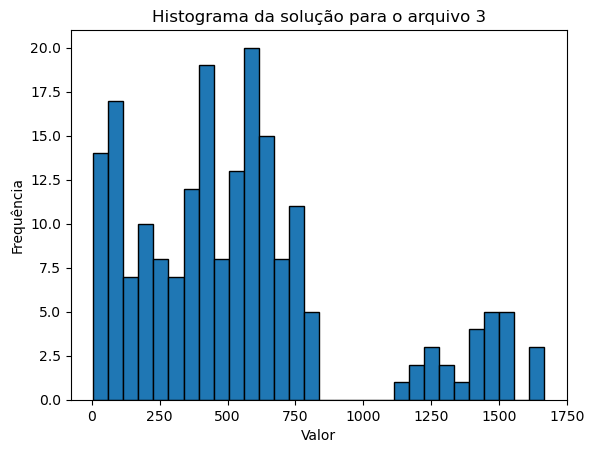

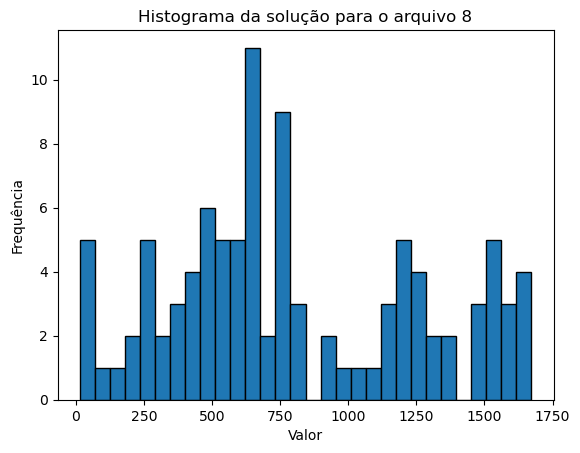

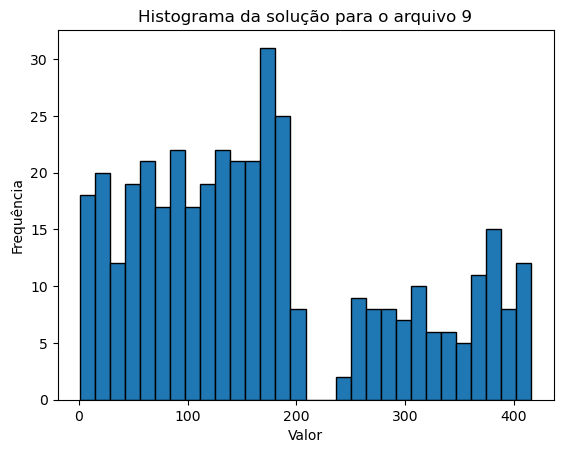

In [51]:
for sol, fil in zip(solucoes, files):
    if sol == 'enhum':
        continue
    # turn sol into a list of integers
    sol = sol.split(',')
    # convert to integers
    sol = [int(x) for x in sol]
    plt.hist(sol, bins=30, edgecolor='black')
    plt.title(f"Histograma da solução para o arquivo {fil}")
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()


Text(1978.7736928104575, 0.5, 'Frequência')

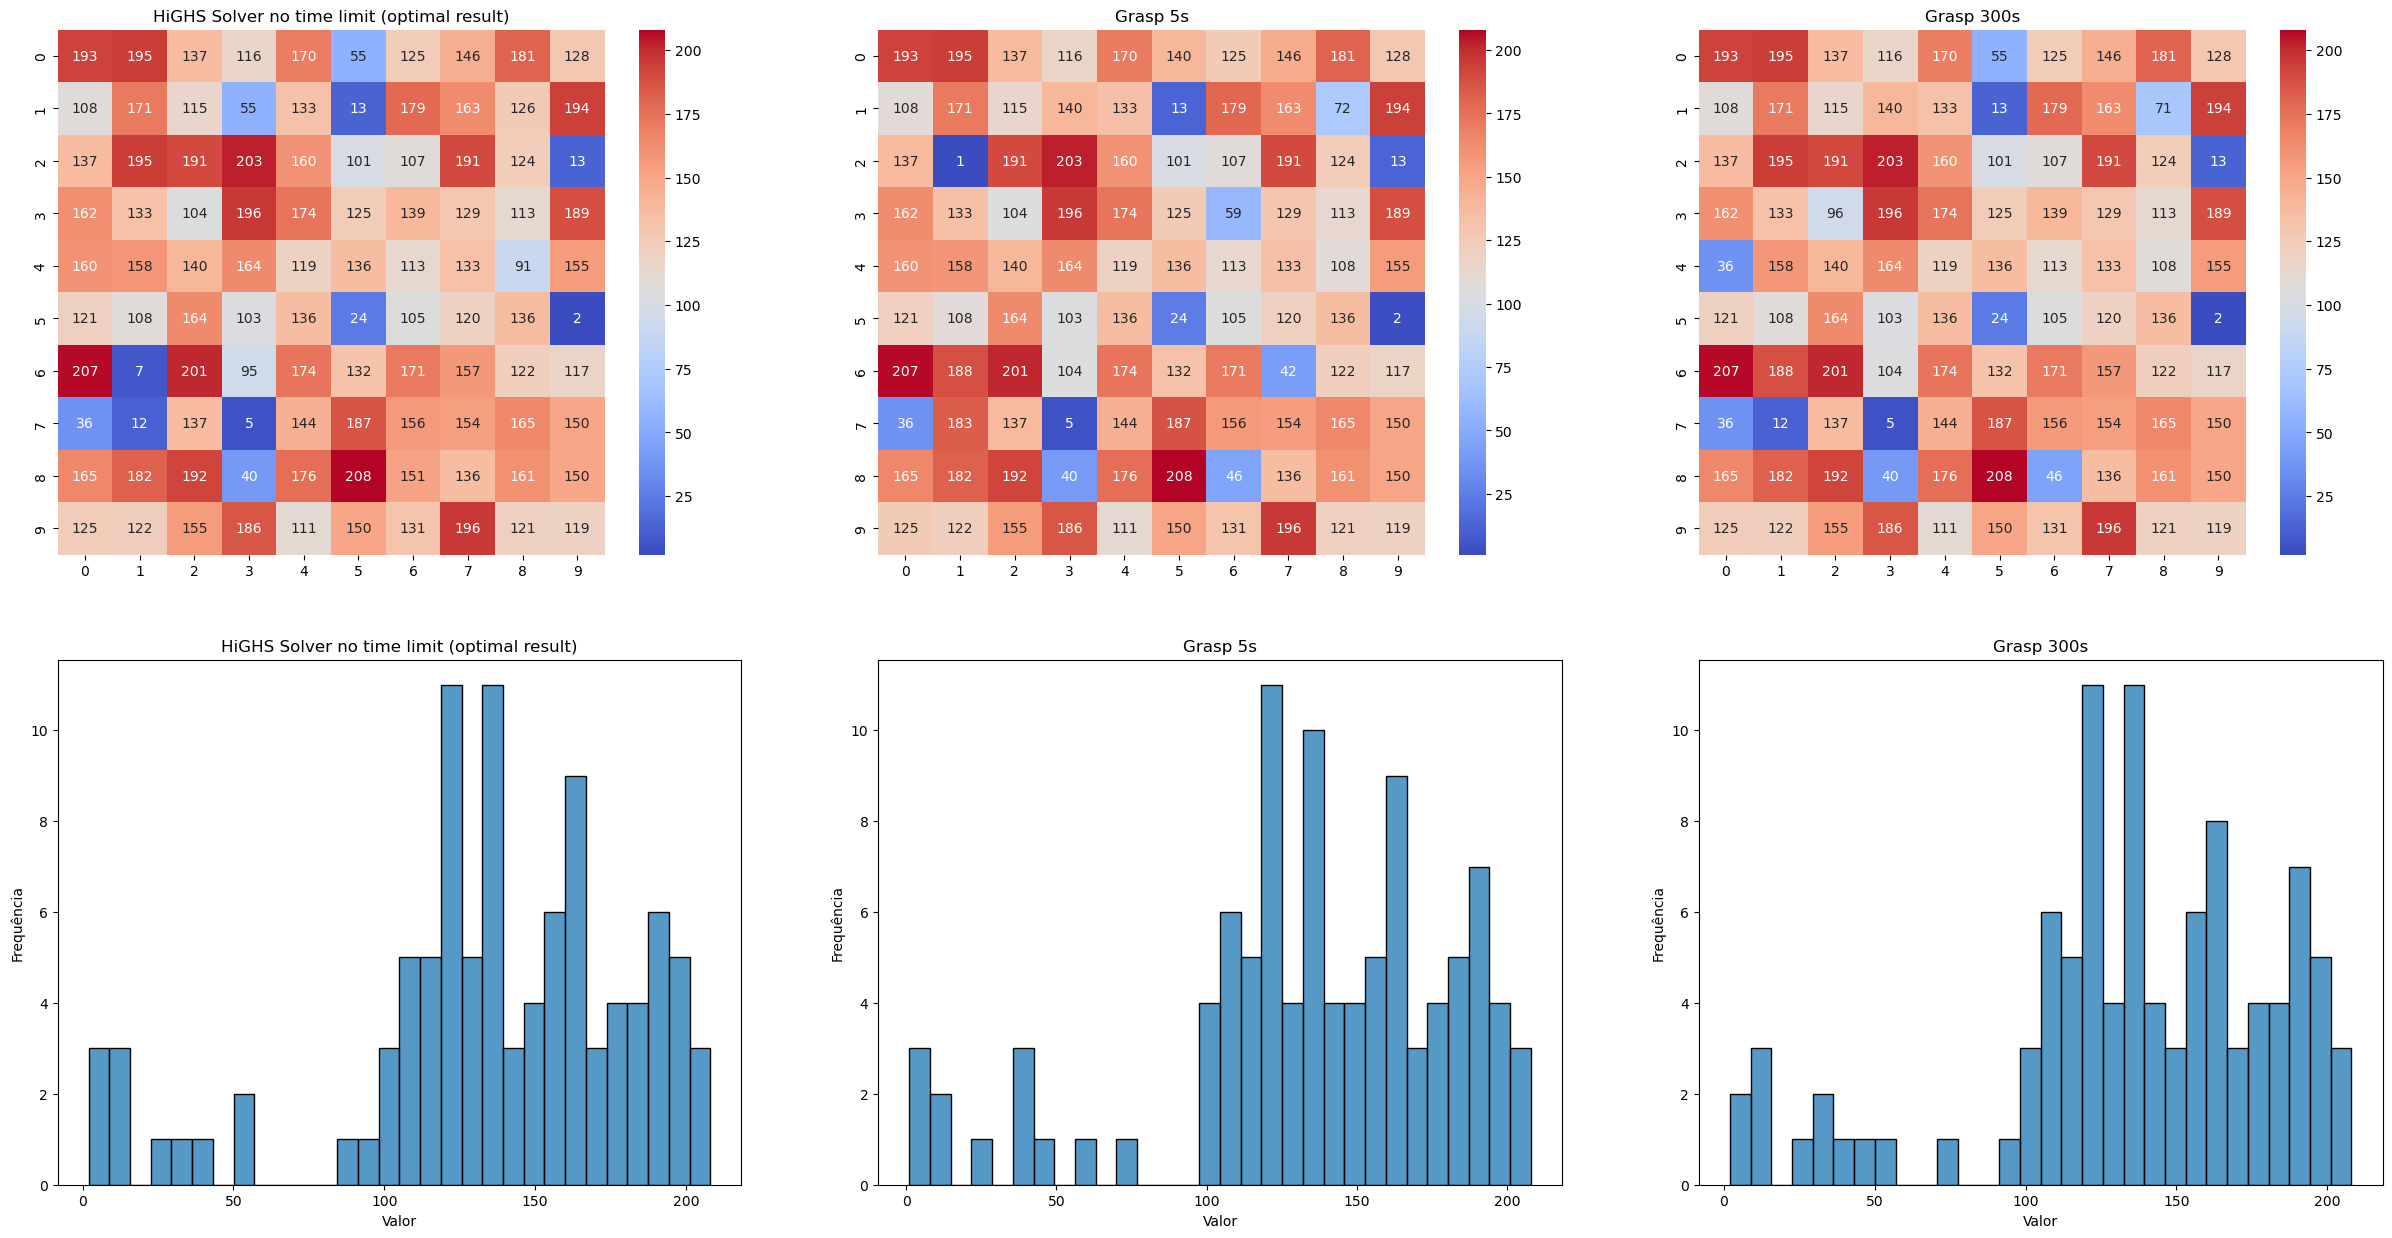

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(30, 15))
import re

# treat files
# open file
with open("resultados_linear_sem_limite.csv", "r") as f:
    lines = f.readlines()
    # change all ',' not inside brackets to ';'
    lines = [re.sub(r'(?![^[]*\]),', ';', line) for line in lines]

with open("linear_no_lim.csv", "w") as f:
    f.writelines(lines)

with open("resultados_grasp_optimized_5.0s_1000i_.csv", "r") as f:
    lines = f.readlines()
    lines = [re.sub(r'(?![^[]*\]),', ';', line) for line in lines]

with open("grasp_5.csv", "w") as f:
    f.writelines(lines)

with open("resultados_grasp_optimized_300.0s_100000i_.csv", "r") as f:
    lines = f.readlines()
    lines = [re.sub(r'(?![^[]*\]),', ';', line) for line in lines]

with open("grasp_300.csv", "w") as f:
    f.writelines(lines)

df_linear = pd.read_csv("linear_no_lim.csv", sep=';')
df_grasp_5 = pd.read_csv("grasp_5.csv", sep=';')
df_grasp_300 = pd.read_csv("grasp_300.csv", sep=';')

# df.columns = df.columns.str.replace(' ', '')
# df = df.replace(' ', '', regex=True)

df_linear = df_linear.replace(' ', '', regex=True)
df_grasp_300 = df_grasp_300.replace(' ', '', regex=True)
df_grasp_5 = df_grasp_5.replace(' ', '', regex=True)

# remove ' ' from columns
df_linear.columns = df_linear.columns.str.replace(' ', '')
df_grasp_5.columns = df_grasp_5.columns.str.replace(' ', '')
df_grasp_300.columns = df_grasp_300.columns.str.replace(' ', '')

solucoes_linear = df_linear["Solução"].values
solucoes_linear = [x[1:-1] for x in solucoes_linear]
files_linear = df_linear["Arquivo"].values


solucoes_grasp_5 = df_grasp_5["best_solution"].values
solucoes_grasp_5 = [x[1:-1] for x in solucoes_grasp_5]
files_grasp_5 = df_grasp_5["filename"].values

solucoes_grasp_300 = df_grasp_300["best_solution"].values
solucoes_grasp_300 = [x[1:-1] for x in solucoes_grasp_300]
files_grasp_300 = df_grasp_300["filename"].values

# compare which solutions are the same
for i in range(len(solucoes_linear)):
    if solucoes_linear[i] == solucoes_grasp_5[i] == solucoes_grasp_300[i]:
        print(f"Arquivo {files_linear[i]} tem solução {solucoes_linear[i]}")


# filll first row with heatmaps
sol_lin = solucoes_linear[0]
sol_lin = sol_lin.split(',')
sol_lin = [int(x) for x in sol_lin]
sol_lin = np.array(sol_lin).reshape(10, 10)

sol_grasp_5 = solucoes_grasp_5[0]
sol_grasp_5 = sol_grasp_5.split(',')
sol_grasp_5 = [int(x) for x in sol_grasp_5]
sol_grasp_5 = np.array(sol_grasp_5).reshape(10, 10)

sol_grasp_300 = solucoes_grasp_300[0]
sol_grasp_300 = sol_grasp_300.split(',')
sol_grasp_300 = [int(x) for x in sol_grasp_300]
sol_grasp_300 = np.array(sol_grasp_300).reshape(10, 10)

sns.heatmap(sol_lin, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title("HiGHS Solver no time limit (optimal result)")
sns.heatmap(sol_grasp_5, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title("Grasp 5s")
sns.heatmap(sol_grasp_300, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 2])
axs[0, 2].set_title("Grasp 300s")

sol_lin = solucoes_linear[0]
sol_lin = sol_lin.split(',')
sol_lin = [int(x) for x in sol_lin]

sol_grasp_5 = solucoes_grasp_5[0]
sol_grasp_5 = sol_grasp_5.split(',')
sol_grasp_5 = [int(x) for x in sol_grasp_5]

sol_grasp_300 = solucoes_grasp_300[0]
sol_grasp_300 = sol_grasp_300.split(',')
sol_grasp_300 = [int(x) for x in sol_grasp_300]


# fill second row with histograms without legend
sns.histplot(sol_lin, bins=30, edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title("HiGHS Solver no time limit (optimal result)")
axs[1, 0].set_xlabel('Valor')
axs[1, 0].set_ylabel('Frequência')
sns.histplot(sol_grasp_5, bins=30, edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title("Grasp 5s")
axs[1, 1].set_xlabel('Valor')
axs[1, 1].set_ylabel('Frequência')
sns.histplot(sol_grasp_300, bins=30, edgecolor='black', ax=axs[1, 2])
axs[1, 2].set_title("Grasp 300s")
axs[1, 2].set_xlabel('Valor')
axs[1, 2].set_ylabel('Frequência')






Text(2650.8325163398695, 0.5, 'Frequência')

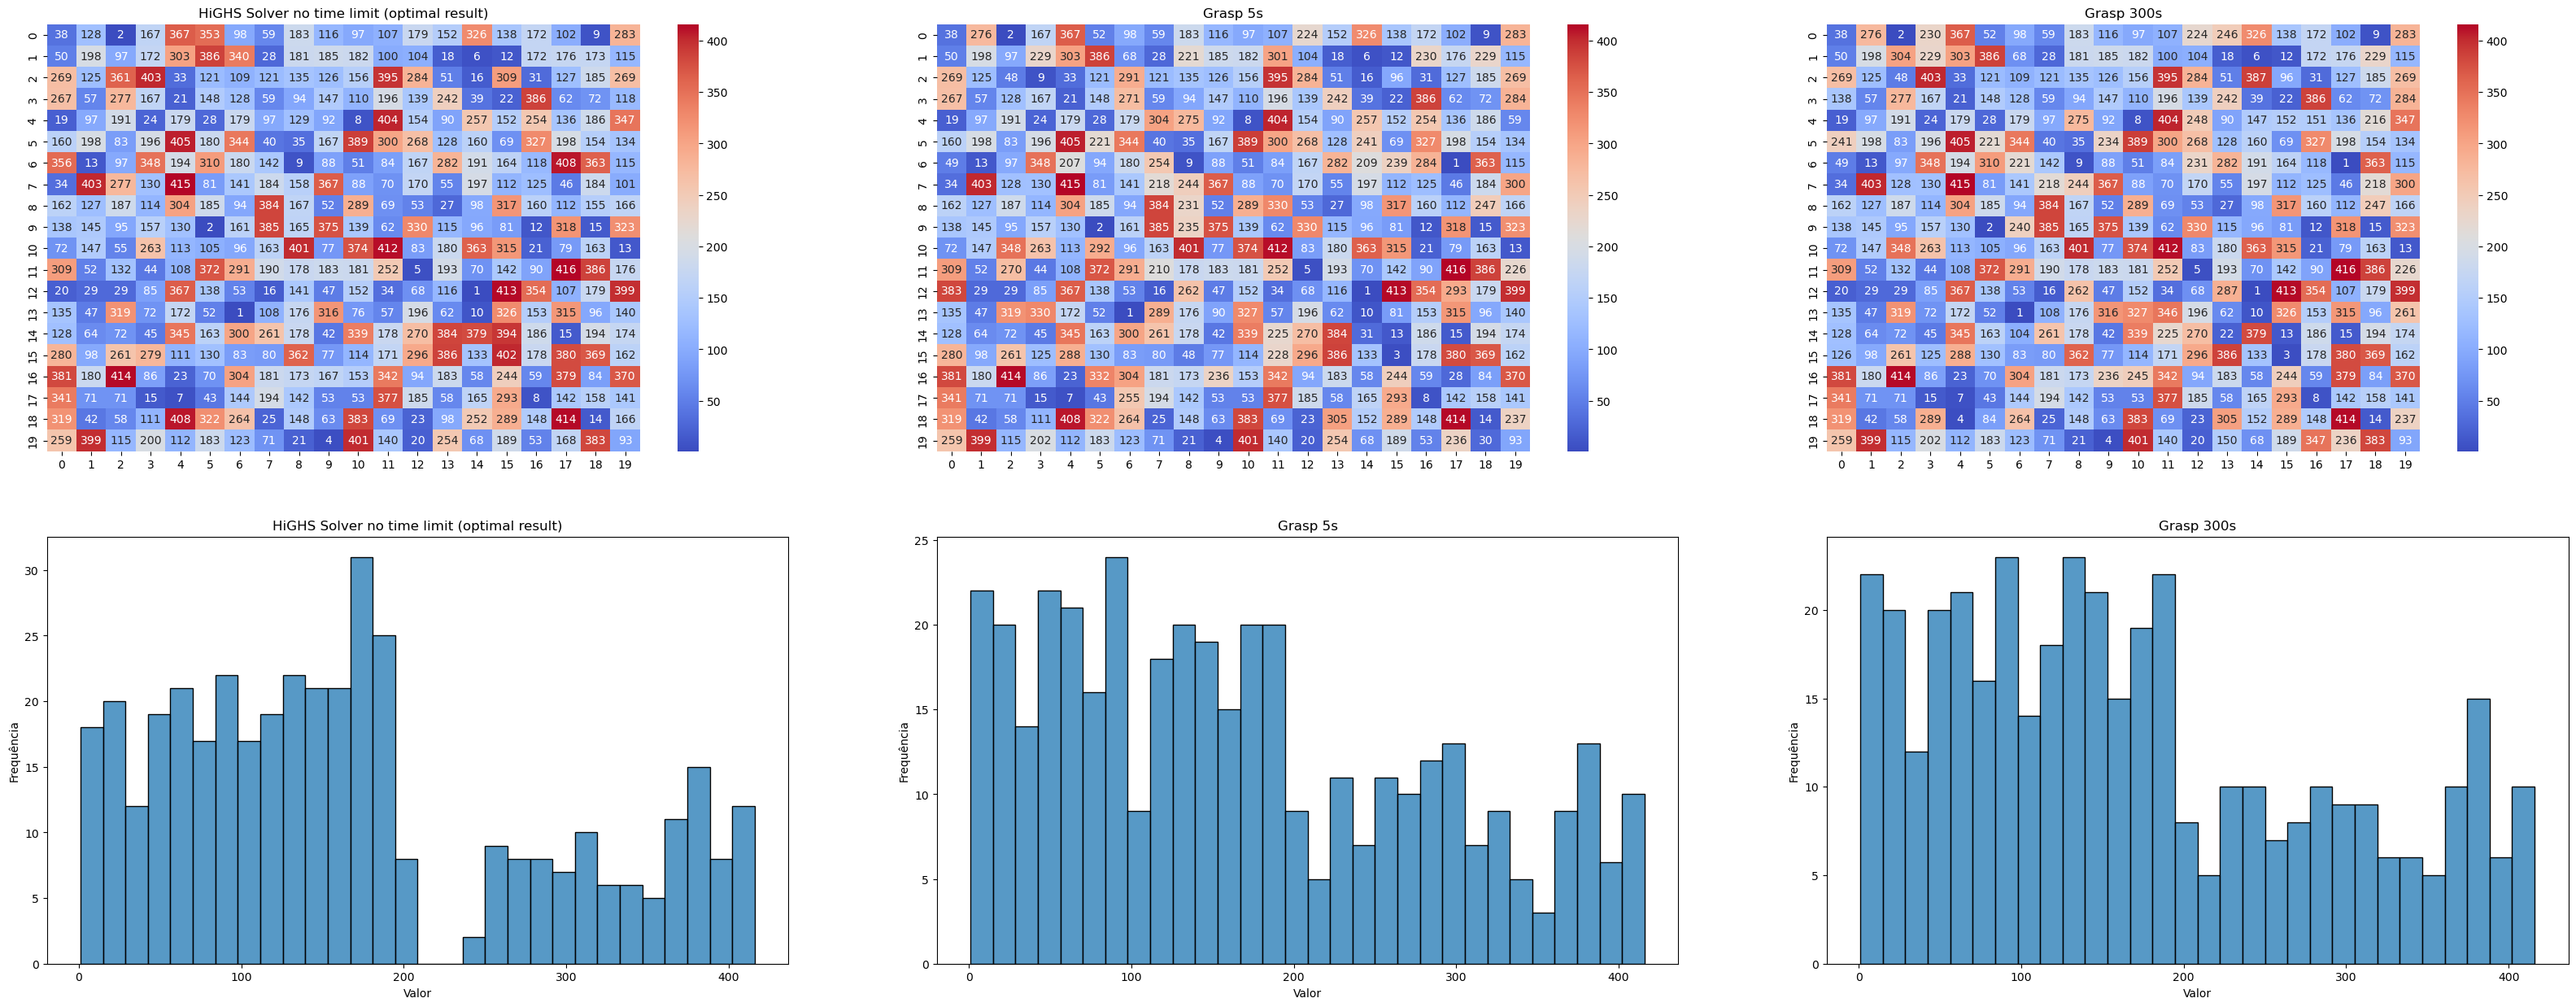

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(40, 15))
import re

# treat files
# open file
with open("resultados_linear_sem_limite.csv", "r") as f:
    lines = f.readlines()
    # change all ',' not inside brackets to ';'
    lines = [re.sub(r'(?![^[]*\]),', ';', line) for line in lines]

with open("linear_no_lim.csv", "w") as f:
    f.writelines(lines)

with open("resultados_grasp_optimized_5.0s_1000i_.csv", "r") as f:
    lines = f.readlines()
    lines = [re.sub(r'(?![^[]*\]),', ';', line) for line in lines]

with open("grasp_5.csv", "w") as f:
    f.writelines(lines)

with open("resultados_grasp_optimized_300.0s_100000i_.csv", "r") as f:
    lines = f.readlines()
    lines = [re.sub(r'(?![^[]*\]),', ';', line) for line in lines]

with open("grasp_300.csv", "w") as f:
    f.writelines(lines)

df_linear = pd.read_csv("linear_no_lim.csv", sep=';')
df_grasp_5 = pd.read_csv("grasp_5.csv", sep=';')
df_grasp_300 = pd.read_csv("grasp_300.csv", sep=';')

# df.columns = df.columns.str.replace(' ', '')
# df = df.replace(' ', '', regex=True)

df_linear = df_linear.replace(' ', '', regex=True)
df_grasp_300 = df_grasp_300.replace(' ', '', regex=True)
df_grasp_5 = df_grasp_5.replace(' ', '', regex=True)

# remove ' ' from columns
df_linear.columns = df_linear.columns.str.replace(' ', '')
df_grasp_5.columns = df_grasp_5.columns.str.replace(' ', '')
df_grasp_300.columns = df_grasp_300.columns.str.replace(' ', '')

solucoes_linear = df_linear["Solução"].values
solucoes_linear = [x[1:-1] for x in solucoes_linear]
files_linear = df_linear["Arquivo"].values


solucoes_grasp_5 = df_grasp_5["best_solution"].values
solucoes_grasp_5 = [x[1:-1] for x in solucoes_grasp_5]
files_grasp_5 = df_grasp_5["filename"].values

solucoes_grasp_300 = df_grasp_300["best_solution"].values
solucoes_grasp_300 = [x[1:-1] for x in solucoes_grasp_300]
files_grasp_300 = df_grasp_300["filename"].values

# compare which solutions are the same
for i in range(len(solucoes_linear)):
    if solucoes_linear[i] == solucoes_grasp_5[i] == solucoes_grasp_300[i]:
        print(f"Arquivo {files_linear[i]} tem solução {solucoes_linear[i]}")


# filll first row with heatmaps
sol_lin = solucoes_linear[8]
sol_lin = sol_lin.split(',')
sol_lin = [int(x) for x in sol_lin]
sol_lin = np.array(sol_lin).reshape(20, 20)

sol_grasp_5 = solucoes_grasp_5[8]
sol_grasp_5 = sol_grasp_5.split(',')
sol_grasp_5 = [int(x) for x in sol_grasp_5]
sol_grasp_5 = np.array(sol_grasp_5).reshape(20, 20)

sol_grasp_300 = solucoes_grasp_300[8]
sol_grasp_300 = sol_grasp_300.split(',')
sol_grasp_300 = [int(x) for x in sol_grasp_300]
sol_grasp_300 = np.array(sol_grasp_300).reshape(20, 20)

sns.heatmap(sol_lin, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title("HiGHS Solver no time limit (optimal result)")
sns.heatmap(sol_grasp_5, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title("Grasp 5s")
sns.heatmap(sol_grasp_300, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 2])
axs[0, 2].set_title("Grasp 300s")

sol_lin = solucoes_linear[8]
sol_lin = sol_lin.split(',')
sol_lin = [int(x) for x in sol_lin]

sol_grasp_5 = solucoes_grasp_5[8]
sol_grasp_5 = sol_grasp_5.split(',')
sol_grasp_5 = [int(x) for x in sol_grasp_5]

sol_grasp_300 = solucoes_grasp_300[8]
sol_grasp_300 = sol_grasp_300.split(',')
sol_grasp_300 = [int(x) for x in sol_grasp_300]


# fill second row with histograms without legend
sns.histplot(sol_lin, bins=30, edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title("HiGHS Solver no time limit (optimal result)")
axs[1, 0].set_xlabel('Valor')
axs[1, 0].set_ylabel('Frequência')
sns.histplot(sol_grasp_5, bins=30, edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title("Grasp 5s")
axs[1, 1].set_xlabel('Valor')
axs[1, 1].set_ylabel('Frequência')
sns.histplot(sol_grasp_300, bins=30, edgecolor='black', ax=axs[1, 2])
axs[1, 2].set_title("Grasp 300s")
axs[1, 2].set_xlabel('Valor')
axs[1, 2].set_ylabel('Frequência')






In [63]:
df_linear = pd.read_csv("linear_no_lim.csv", sep=';')
df_grasp_5 = pd.read_csv("grasp_5.csv", sep=';')
df_grasp_300 = pd.read_csv("grasp_300.csv", sep=';')

# df.columns = df.columns.str.replace(' ', '')
# df = df.replace(' ', '', regex=True)

df_linear = df_linear.replace(' ', '', regex=True)
df_grasp_300 = df_grasp_300.replace(' ', '', regex=True)
df_grasp_5 = df_grasp_5.replace(' ', '', regex=True)

# remove ' ' from columns
df_linear.columns = df_linear.columns.str.replace(' ', '')
df_grasp_5.columns = df_grasp_5.columns.str.replace(' ', '')
df_grasp_300.columns = df_grasp_300.columns.str.replace(' ', '')

# turn all numbers into integers
df_linear["Solução"] = df_linear["Melhor_valor_encontrado"].astype(int)
df_grasp_5["best_value"] = df_grasp_5["best_value"].astype(int)
df_grasp_300["best_value"] = df_grasp_300["best_value"].astype(int)


# create a new df comparing best solutions in & using linear as base
df_compare = pd.DataFrame()
df_compare["Arquivo"] = df_linear["Arquivo"]
df_compare["Solução HiGHS"] = df_linear["Solução"]
df_compare["Solução Grasp 5s"] = df_grasp_5["best_value"]
df_compare["Solução Grasp 300s"] = df_grasp_300["best_value"]
df_compare["bound"] = df_linear["Bound"]

df_compare["% GRASP/HiGHS 5s"] =  abs(1-df_compare["Solução Grasp 5s"]/df_compare["Solução HiGHS"])
df_compare["% GRASP/HiGHS 300s"] = abs(1-df_compare["Solução Grasp 300s"]/df_compare["Solução HiGHS"])

# latex
print(df_compare.to_latex(index=False))
df_compare

\begin{tabular}{rrrrrrr}
\toprule
Arquivo & Solução HiGHS & Solução Grasp 5s & Solução Grasp 300s & bound & % GRASP/HiGHS 5s & % GRASP/HiGHS 300s \\
\midrule
1 & 1034999 & 1034418 & 1034809 & 1035012 & 0.000561 & 0.000184 \\
2 & 11984785 & 11976398 & 11983213 & 11984804 & 0.000700 & 0.000131 \\
3 & 45979231 & 45898177 & 45898177 & 45983779 & 0.001763 & 0.001763 \\
4 & 34178023 & 34169225 & 34172895 & 34178593 & 0.000257 & 0.000150 \\
5 & 8202061 & 8196666 & 8197571 & 8202061 & 0.000658 & 0.000547 \\
6 & 29749789 & 29732090 & 29737000 & 29752395 & 0.000595 & 0.000430 \\
7 & 206913418 & 206796746 & 206863654 & 206914284 & 0.000564 & 0.000241 \\
8 & 42668196 & 42627558 & 42644514 & 4266826 & 0.000952 & 0.000555 \\
9 & 8461953 & 8443590 & 8450559 & 8461955 & 0.002170 & 0.001346 \\
10 & 48352227 & 48326460 & 48332953 & 48352227 & 0.000533 & 0.000399 \\
\bottomrule
\end{tabular}



,Arquivo,Solução HiGHS,Solução Grasp 5s,Solução Grasp 300s,bound,% GRASP/HiGHS 5s,% GRASP/HiGHS 300s
0,1,1034999,1034418,1034809,1035012,0.000561,0.000184
1,2,11984785,11976398,11983213,11984804,0.000700,0.000131
2,3,45979231,45898177,45898177,45983779,0.001763,0.001763
3,4,34178023,34169225,34172895,34178593,0.000257,0.000150
4,5,8202061,8196666,8197571,8202061,0.000658,0.000547
5,6,29749789,29732090,29737000,29752395,0.000595,0.000430
6,7,206913418,206796746,206863654,206914284,0.000564,0.000241
7,8,42668196,42627558,42644514,4266826,0.000952,0.000555
8,9,8461953,8443590,8450559,8461955,0.002170,0.001346
9,10,48352227,48326460,48332953,48352227,0.000533,0.000399
